In [1]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.sample import saltelli
from SALib.analyze import sobol

from SALib.test_functions import Ishigami
from mpmath import *

In [14]:
Ishigami
# def TLMtwo(f,p):
   
#     omega = 2 * np.pi * np.array(f)
#     R1, R2, Q, delta1, alpha = p[0], p[1], p[2], p[3], p[4]
#     delta2=1-delta1
#     k12=R2/R1
#     wc1=1/(R1*Q)
#     wc2=1/(R2*Q)
#     S1=np.sqrt((omega*1j)**alpha/wc1)
#     S2=np.sqrt((omega*1j)**alpha/wc2)
#     C1=1/np.tanh(delta1*S1)
#     C2=1/np.tanh(delta2*S2)

#     Z=2*(R1)*(C1*C2*S1*k12+S2)/(S1*(C2*S1*k12+C1*S2))

#     return np.abs(Z)
def TLMlinnew(f,p):
    omega = 2 * np.pi * np.array(f)
    R1, R2, Q, alpha = p[0], p[1], p[2], p[3]
    t12=R1/R2
    S=np.sqrt((1j*omega)**alpha*R1*Q)
    kk1=-2/3*(S*(t12**(-1/2)/(t12-1)))
    kk2=-2/3*(t12*S/(t12-1))
    Z=[]
    for omg in omega:
        S=np.sqrt((1j*omg)**alpha*R1*Q)
        # print(t12-1)
        kk1=-2/3*(S*(t12**(-1/2)/(t12-1)))
        kk2=-2/3*(t12*S/(t12-1))
        # print("omega :", omg)
        # print("deno1 :",(mp.besseli(-1/3, kk1))*mp.besseli(1/3, kk2))
        # print("deno2 :",mp.besseli(1/3, kk1)*mp.besseli(-1/3, kk2))
        # print("deno :",((mp.besseli(-1/3, kk1))*mp.besseli(1/3, kk2)-mp.besseli(1/3, kk1)*mp.besseli(-1/3, kk2)))
        # print(((mp.besseli(-1/3, kk1))*mp.besseli(1/3, kk2)-mp.besseli(1/3, kk1)*mp.besseli(-1/3, kk2)))
        Zelem = (2*R1/S)*(mp.besseli(1/3, kk1)*mp.besseli(2/3, kk2)-mp.besseli(-1/3, kk1)*mp.besseli(-2/3, kk2))/((mp.besseli(-1/3, kk1))*mp.besseli(1/3, kk2)-mp.besseli(1/3, kk1)*mp.besseli(-1/3, kk2))
        Zelem=mp.nstr(Zelem,n=50)
        Zelem = Zelem.replace(' ','').replace('(','').replace(')','') 
        Z.append(Zelem)

    Z=np.asarray(Z,dtype=complex)
    return np.abs(Z)

# def TLMtwo(f,p):
   
#     omega = 2 * np.pi * np.array(f)
#     R1, R2, Q, delta1, alpha = p[0], p[1], p[2], p[3], p[4]
#     Z=R1+R2**alpha+omega*delta1+Q*omega

#     return np.abs(Z)

# def TLMtwo(f,R1, R2, Q, delta1, alpha):
   
#     omega = 2 * np.pi * np.array(f)
#     # R1, R2, Q, delta1, alpha = p[0], p[1], p[2], p[3], p[4]
#     Z=R1+R2**alpha+omega*delta1+Q*omega

#     return np.abs(Z)

In [15]:
problem ={
    'num_vars': 4,
    'names': ['R1','R2', 'Q', 'α'],
    'bounds': [[500,2000],[500,2000],[1e-4,1e-3],[0.8,1]]
}


In [20]:
param_values = saltelli.sample(problem, 2**4)

# print(param_values)

# evaluate
f = np.logspace(-2, 2, 50)
mp.dps=100
y = np.array([TLMlinnew(f, params) for params in param_values])

# print(param_values.shape)
# print(y.shape)
# print(y)
# analyse
sobol_indices = [sobol.analyze(problem, Y) for Y in y.T]

# print("Sobol Indices")
# print(sobol_indices)

C:\Users\Gaming\AppData\Local\Temp\ipykernel_27616\313245396.py:1: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2**4)
C:\Users\Gaming\AppData\Local\Temp\ipykernel_27616\4261945857.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  kk1=-2/3*(S*(t12**(-1/2)/(t12-1)))
C:\Users\Gaming\AppData\Local\Temp\ipykernel_27616\4261945857.py:23: RuntimeWarning: invalid value encountered in multiply
  kk1=-2/3*(S*(t12**(-1/2)/(t12-1)))
C:\Users\Gaming\AppData\Local\Temp\ipykernel_27616\4261945857.py:24: RuntimeWarning: divide by zero encountered in divide
  kk2=-2/3*(t12*S/(t12-1))
C:\Users\Gaming\AppData\Local\Temp\ipykernel_27616\4261945857.py:24: RuntimeWarning: invalid value encountered in multiply
  kk2=-2/3*(t12*S/(t12-1))
C:\Users\Gaming\AppData\Local\Temp\ipykernel_27616\4261945857.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  kk1=-2/3*(S*(t12**(-1/2

[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]


C:\Users\Gaming\AppData\Local\Temp\ipykernel_27616\287471607.py:33: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


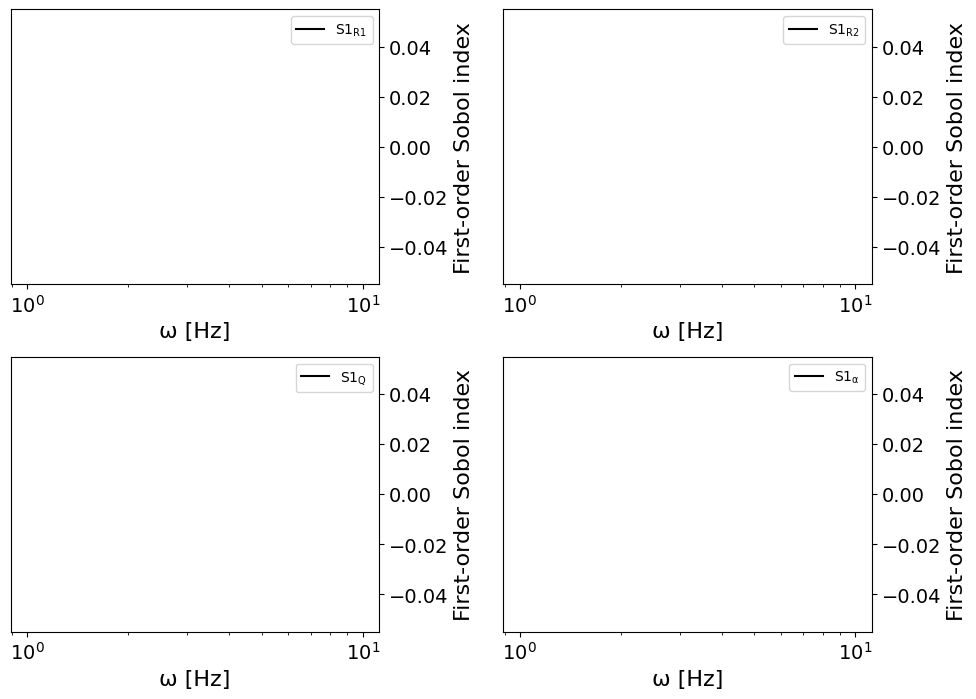

In [21]:
S1s = np.array([s['S1'] for s in sobol_indices])

print(S1s)

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
gs = fig.add_gridspec(3, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
# ax4 = fig.add_subplot(gs[2, 0])
# ax4 = fig.add_subplot(gs[2, 1])
# ax2 = fig.add_subplot(gs[1, 1])



for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(f, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='black')
    ax.set_xscale("log")
    ax.set_xlabel("ω [Hz]",fontsize=16) 
    ax.set_ylabel("First-order Sobol index",fontsize=16)

    # ax.set_ylim(0, 1.04)
    ax.tick_params(labelsize=14)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right')

fig.tight_layout()
fig.savefig("ownSobol.png",dpi=500)
plt.show()